## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [1]:
# your answer here
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import stats
import numpy as np

Power_divergenceResult(statistic=5.526588649191276, pvalue=0.5959787428784398)

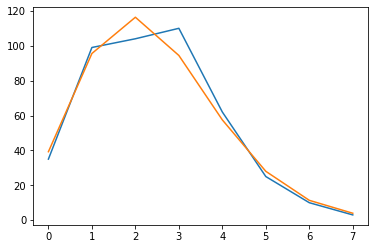

In [33]:
#observed:
observed = [35, 99, 104, 110, 62, 25, 10, 3]
plt.plot(observed)
# expected:
expected = [poisson.pmf(x, 2.435)*448 for x in range(8)]
plt.plot(expected)

stats.chisquare(observed, f_exp=expected)

# I created a list with the expected points if it was a poisson function.
# Plotting it is possible to see that they are pretty similar.
# Checking with the chisquare we can see the high pvalue, which also indicates the similarity of
# the results, so the null hypothesis cannot be rejected.
# Null hypothesis = It is a Poisson variable.
# So, it's reasonable to assume that the score might be a Poisson variable.

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [47]:
#your answer here
observed = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
#expected:
expected = stats.norm(loc=985, scale=50)
stats.kstest(observed, expected.cdf)
# It is possible that the sats in both years had similar results, since we cannot
# reject the null hypothesis, considering the high pvalue.

KstestResult(statistic=0.1581291279406798, pvalue=0.847406396427736)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

Power_divergenceResult(statistic=59.71265003654811, pvalue=3.333550165614647e-12)

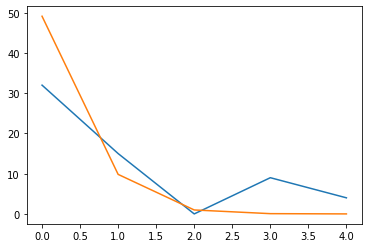

In [5]:
##### your code here
observed = [32,15,0,9,4]
obscaled = np.array(observed)/60 # Why did this one only worked when I divided by the total?
expected = [poisson.pmf(x, np.mean(obscaled))*60 for x in range(5)]
plt.plot(observed)
plt.plot(expected)
stats.chisquare(obscaled, f_exp=expected)
# As we can see, the null hypothesis is rejected since the pvalue is so low.
# Also, the graph proves that there aren't many similar values.


## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table6.png)


Power_divergenceResult(statistic=6.730152995610064, pvalue=0.034559372300758)

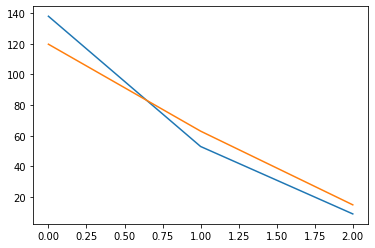

In [6]:
# your answer here
observed = [138, 53, 9]
expected = [stats.binom.pmf(x, 10, 0.05)*200 for x in range(3)]
plt.plot(observed)
plt.plot(expected)
stats.chisquare(observed, f_exp=expected)
# The null hypothesis can be rejected, since it's a bit lower than the 0.05.

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [7]:
#your answer here
observed = [32,12, 14,22, 6,9]
expected = [44*52/95, 44*43/95, 36*52/95, 36*43/95, 15*52/95, 15*43/95]
chi = sum((np.array(observed) - np.array(expected))**2 / np.array(expected))
dof = 95-1
alpha = 0.05
critical_value = stats.chi2.ppf(q = 1 - alpha, df = dof)
print("Null hypothesis rejected") if critical_value < chi else \
print("Null hypothesis can't be rejected")
chi, critical_value

Null hypothesis can't be rejected


(10.712198008709638, 117.63165114234555)